In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import tree 
  
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
  
import warnings 
warnings.filterwarnings('ignore') 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
iris = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
x = iris.iloc[:, [0, 1, 2, 3]].values

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris[0:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


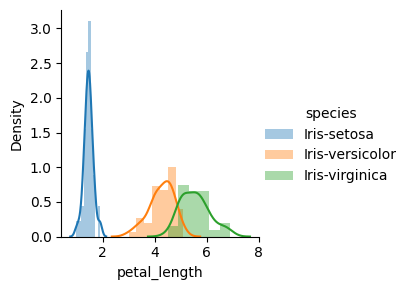

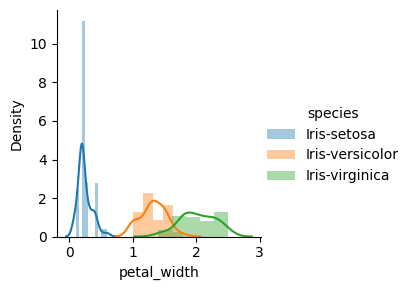

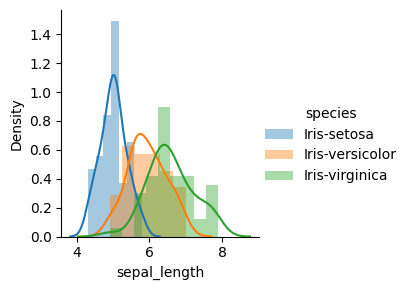

In [7]:
iris_setosa = iris.loc[iris["species"] == "Iris-setosa"]
iris_virginica = iris.loc[iris["species"] == "Iris-virginica"]
iris_versicolor = iris.loc[iris["species"] == "Iris-versicolor"]

sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_length").add_legend()
plt.show()

* It seems feature Petal length properly differentiates  classes
* Hence  feature importance of petal length should be more

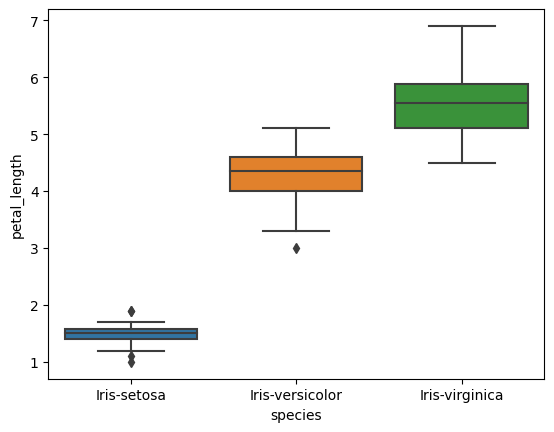

In [8]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

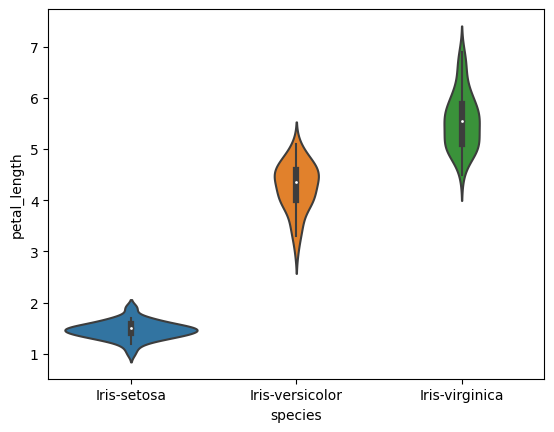

In [9]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

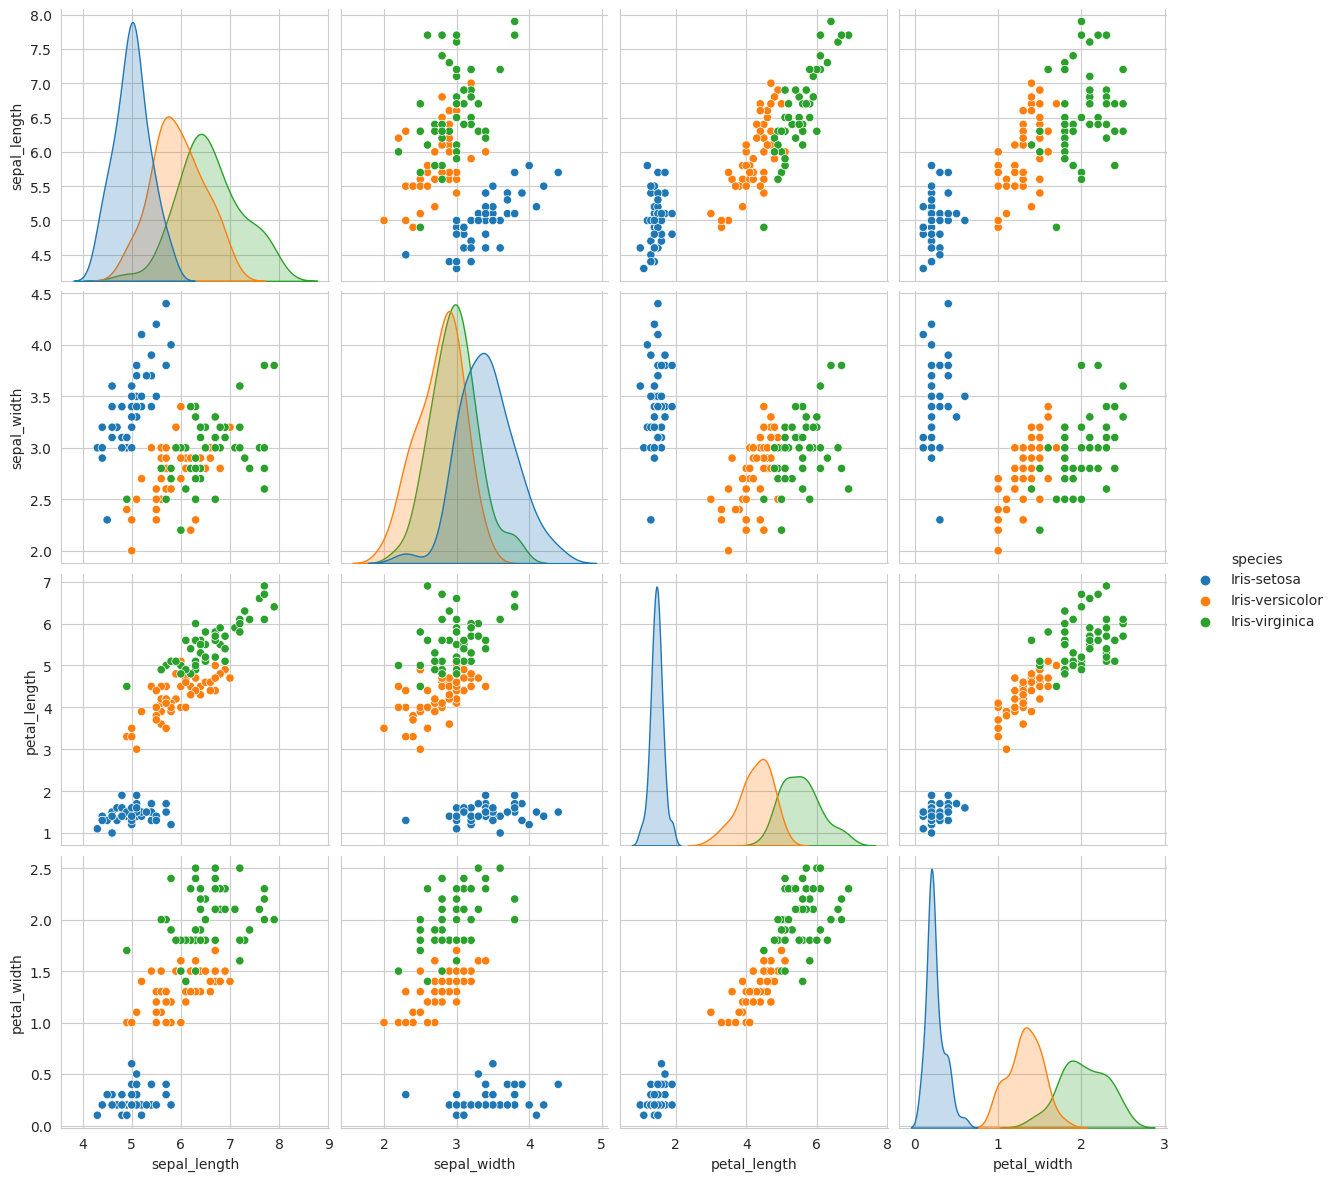

In [10]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

**K-Means**
K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

How to Implementing K-Means Clustering ?
Choose the number of clusters k
Select k random points from the data as centroids
Assign all the points to the closest cluster centroid
Recompute the centroids of newly formed clusters
Repeat steps 3 and 4

In [11]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**elbow method to determine the optimal number of clusters for k-means clustering**

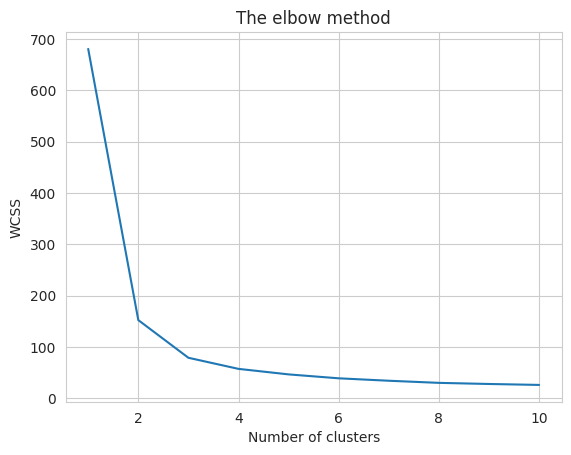

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squareas
plt.show()

**Implementing K-Means Clustering**

In [13]:
wcss = [] 
  
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_) 
      
# from above array with help of elbow method 
#we can get no of cluster to provide. 
kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0) 
y_kmeans = kmeans.fit_predict(x) 

**Visualizing the Clusters**

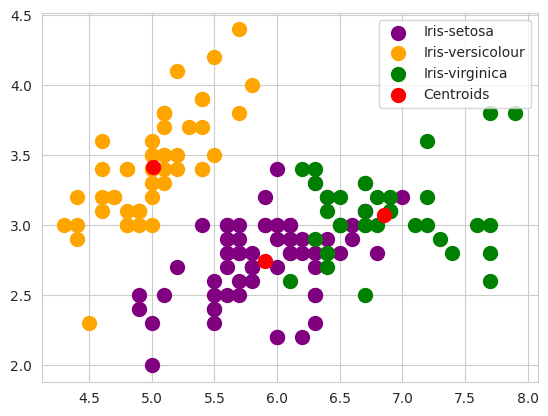

In [14]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

**Accuracy and Performance of Model**

In [15]:
pd.crosstab(iris["species"], y_kmeans) 

col_0,0,1,2
species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


* Setosa class is clustered perfectly.
* Versicolor has only 2 misclassifications.
* Class Virginica is getting overlapped with Versicolor, resulting in 14 misclassifications.
* These observations suggest that the model is performing well for Setosa and reasonably well for Versicolor, but it struggles to distinguish between Virginica and Versicolor, leading to a higher number of misclassifications for Virginica. This could indicate a need for further refinement or exploration of the features used in the clustering process.